In [121]:
import pandas as pd
import matplotlib.pyplot as plt


Importing the Data for Analysing

In [122]:
movie_data = pd.read_csv("cost_revenue_dirty.csv")

In [123]:
movie_data.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [124]:
movie_data.describe()

,Rank
count,5391.000000
mean,2696.000000
std,1556.391981
min,1.000000
25%,1348.500000
50%,2696.000000
75%,4043.500000
max,5391.000000


In [125]:
movie_data.isnull().sum()

Rank                     0
Release Date             0
Movie Title              0
Production Budget ($)    0
Worldwide Gross ($)      0
Domestic Gross ($)       0
dtype: int64

Cleaning the Data

 If the value is a string, then remove currency symbol and delimiters otherwise, the value is numeric and can be converted


In [126]:
def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [127]:
movie_data['Production Budget ($)'] = movie_data['Production Budget ($)'].apply(clean_currency).astype('float')
movie_data['Worldwide Gross ($)'] = movie_data['Worldwide Gross ($)'].apply(clean_currency).astype('float')
movie_data['Domestic Gross ($)'] = movie_data['Domestic Gross ($)'].apply(clean_currency).astype('float')

After removing the $ symbol we can now use this data for further training

In [128]:
movie_data.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,110000.0,11000000.0,10000000.0
1,5140,5/9/1916,Intolerance,385907.0,0.0,0.0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000.0,8000000.0,8000000.0
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000.0,3000000.0,3000000.0
4,5222,1/1/1925,The Big Parade,245000.0,22000000.0,11000000.0


As you can see from the above data there are '0' in the Columns Worldwide Gross and Domestic Gross Column. 
We don't really need those values, because we don't know whether the movie has been released or having some postproduction problems. Hence, we can remove the rows which have '0' Values.

In [129]:
movie_data.drop(movie_data.index[movie_data['Worldwide Gross ($)'] == 0], inplace = True)

In [130]:
movie_data.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,110000.0,11000000.0,10000000.0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000.0,8000000.0,8000000.0
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000.0,3000000.0,3000000.0
4,5222,1/1/1925,The Big Parade,245000.0,22000000.0,11000000.0
5,4250,12/30/1925,Ben-Hur,3900000.0,9000000.0,9000000.0


In [131]:
movies_data.describe()

,Production Budget ($),Worldwide Gross ($)
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


Removing the Column which are not necessary for training

In [132]:
movies_data = movie_data.drop(columns=['Rank','Release Date','Movie Title','Domestic Gross ($)'])

In [133]:
movies_data.head()

,Production Budget ($),Worldwide Gross ($)
0,110000.0,11000000.0
2,200000.0,8000000.0
3,100000.0,3000000.0
4,245000.0,22000000.0
5,3900000.0,9000000.0


Visualization of Data

In [134]:
X = movie_data['Production Budget ($)']
y = movie_data['Worldwide Gross ($)']

Text(0.5, 1.0, 'Production vs World Wide Gross')

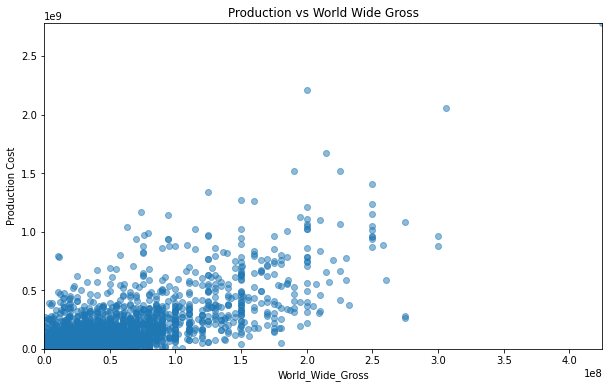

In [135]:
plt.figure(figsize=(10,6))
plt.scatter(X,y, alpha=0.5 )
plt.xlim(0,4.250000e+08)
plt.ylim(0,2.783919e+09)
plt.xlabel("World_Wide_Gross")
plt.ylabel("Production Cost")
plt.title("Production vs World Wide Gross")

Training the Model with only one feature and one target variable

In [136]:
from sklearn.linear_model import LinearRegression


In [137]:
model = LinearRegression()


In [138]:
X = X.array.reshape(-1,1) #as X has only 1d array converting it to 2D for better processing

In [143]:
pred = model.fit(X, y)
print("Coefficient:", pred.coef_)
print("Intercept: ", pred.intercept_)
print("Accuracy: ", pred.score(X,y))


Coefficient: [3.11150918]
Intercept:  -7236192.729139432
Accuracy:  0.5496485356985727


Text(0.5, 1.0, 'Production vs World Wide Gross')

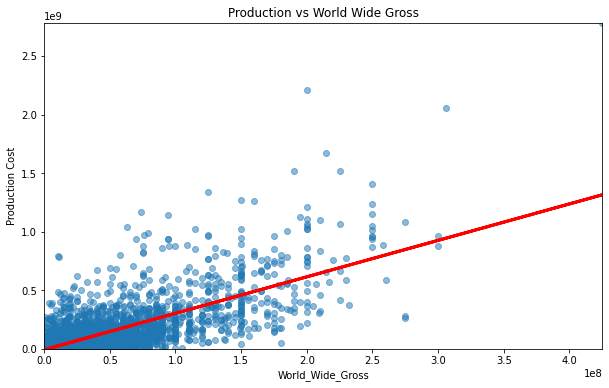

In [145]:
plt.figure(figsize=(10,6))
plt.scatter(X,y, alpha=0.5 )
plt.plot(X, pred.predict(X), color = 'Red', linewidth = 3)
plt.xlim(0,4.250000e+08)
plt.ylim(0,2.783919e+09)
plt.xlabel("World_Wide_Gross")
plt.ylabel("Production Cost")
plt.title("Production vs World Wide Gross")